In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import os
import json
from matplotlib.cm import ScalarMappable
from matplotlib.pyplot import cm
sns.set()

In [6]:
path = "C:/Users/18565/Desktop/Classes/VA/Project/Code/VA-Project/"

In [11]:
df = pd.read_csv(os.path.join(path,"data/data with added gate category for tableau.csv"),index_col=0)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index("Timestamp",inplace=True)

In [25]:
df.head()

,car-id,car-type,gate-name,gate_category
Timestamp,,,,
2015-05-01 00:43:28,20154301124328-262,4,entrance3,entrance
2015-05-01 01:03:48,20154301124328-262,4,general-gate1,general-gate
2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2,ranger-stop
2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0,ranger-stop
2015-05-01 01:12:36,20154301124328-262,4,general-gate2,general-gate


# Plot Std Mean of total traffic flux 

## At Each Gate

In [13]:
dummy = pd.get_dummies(df['gate-name'],dtype=int)
numerical_data = pd.concat((df,dummy),axis=1)
summary = numerical_data.describe()

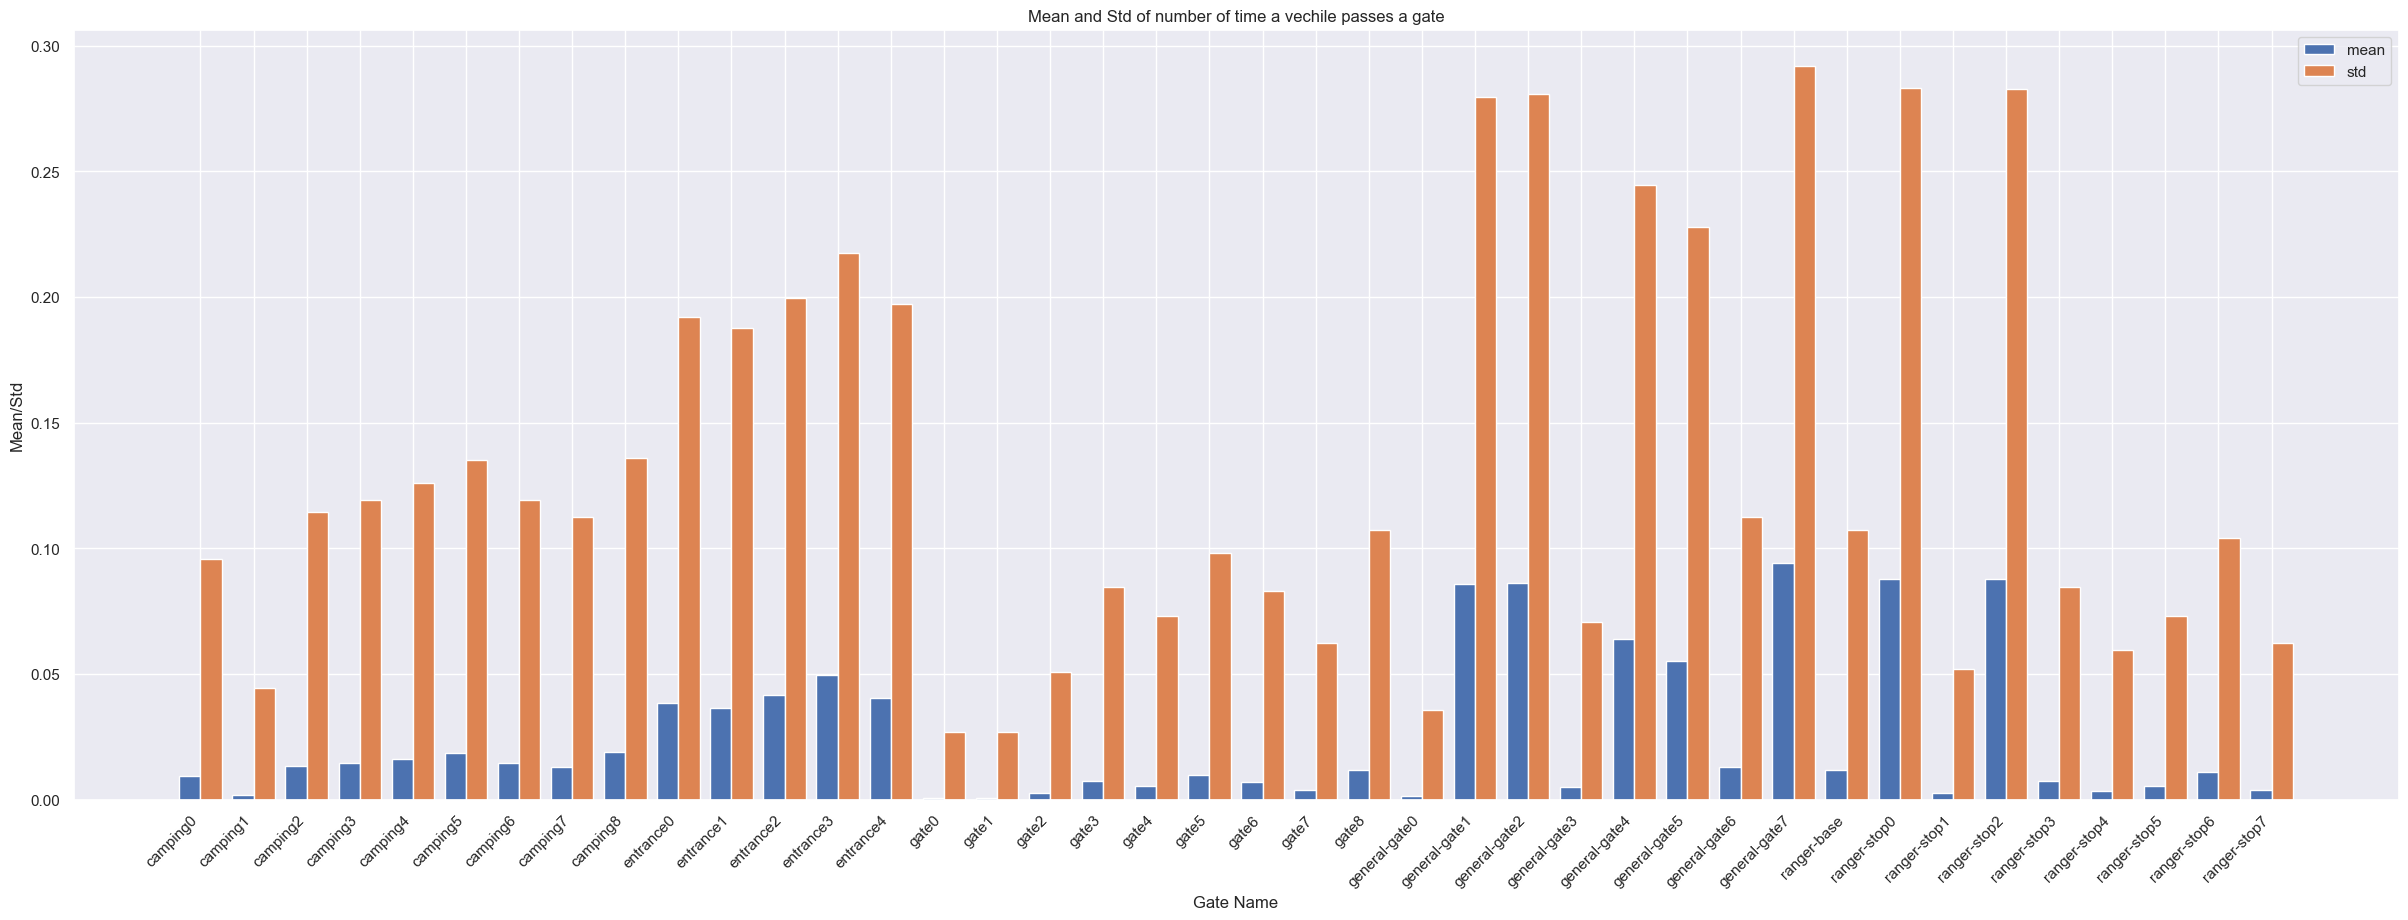

In [16]:
X = summary.columns
mean = list(summary.loc['mean'])
std = list(summary.loc['std'])
  
X_axis = np.arange(len(X)) 
fig = plt.figure(figsize=(30,10))
plt.bar(X_axis - 0.2, mean, 0.4, label = 'mean') 
plt.bar(X_axis + 0.2, std, 0.4, label = 'std') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Gate Name") 
plt.xticks(rotation=45, ha='right')
plt.ylabel("Mean/Std") 
plt.title("Mean and Std of number of time a vechile passes a gate") 
plt.legend() 
plt.show() 

In [18]:
dummy = pd.get_dummies(df['gate_category'],dtype=int)
numerical_data = pd.concat((df,dummy),axis=1)
summary = numerical_data.describe()

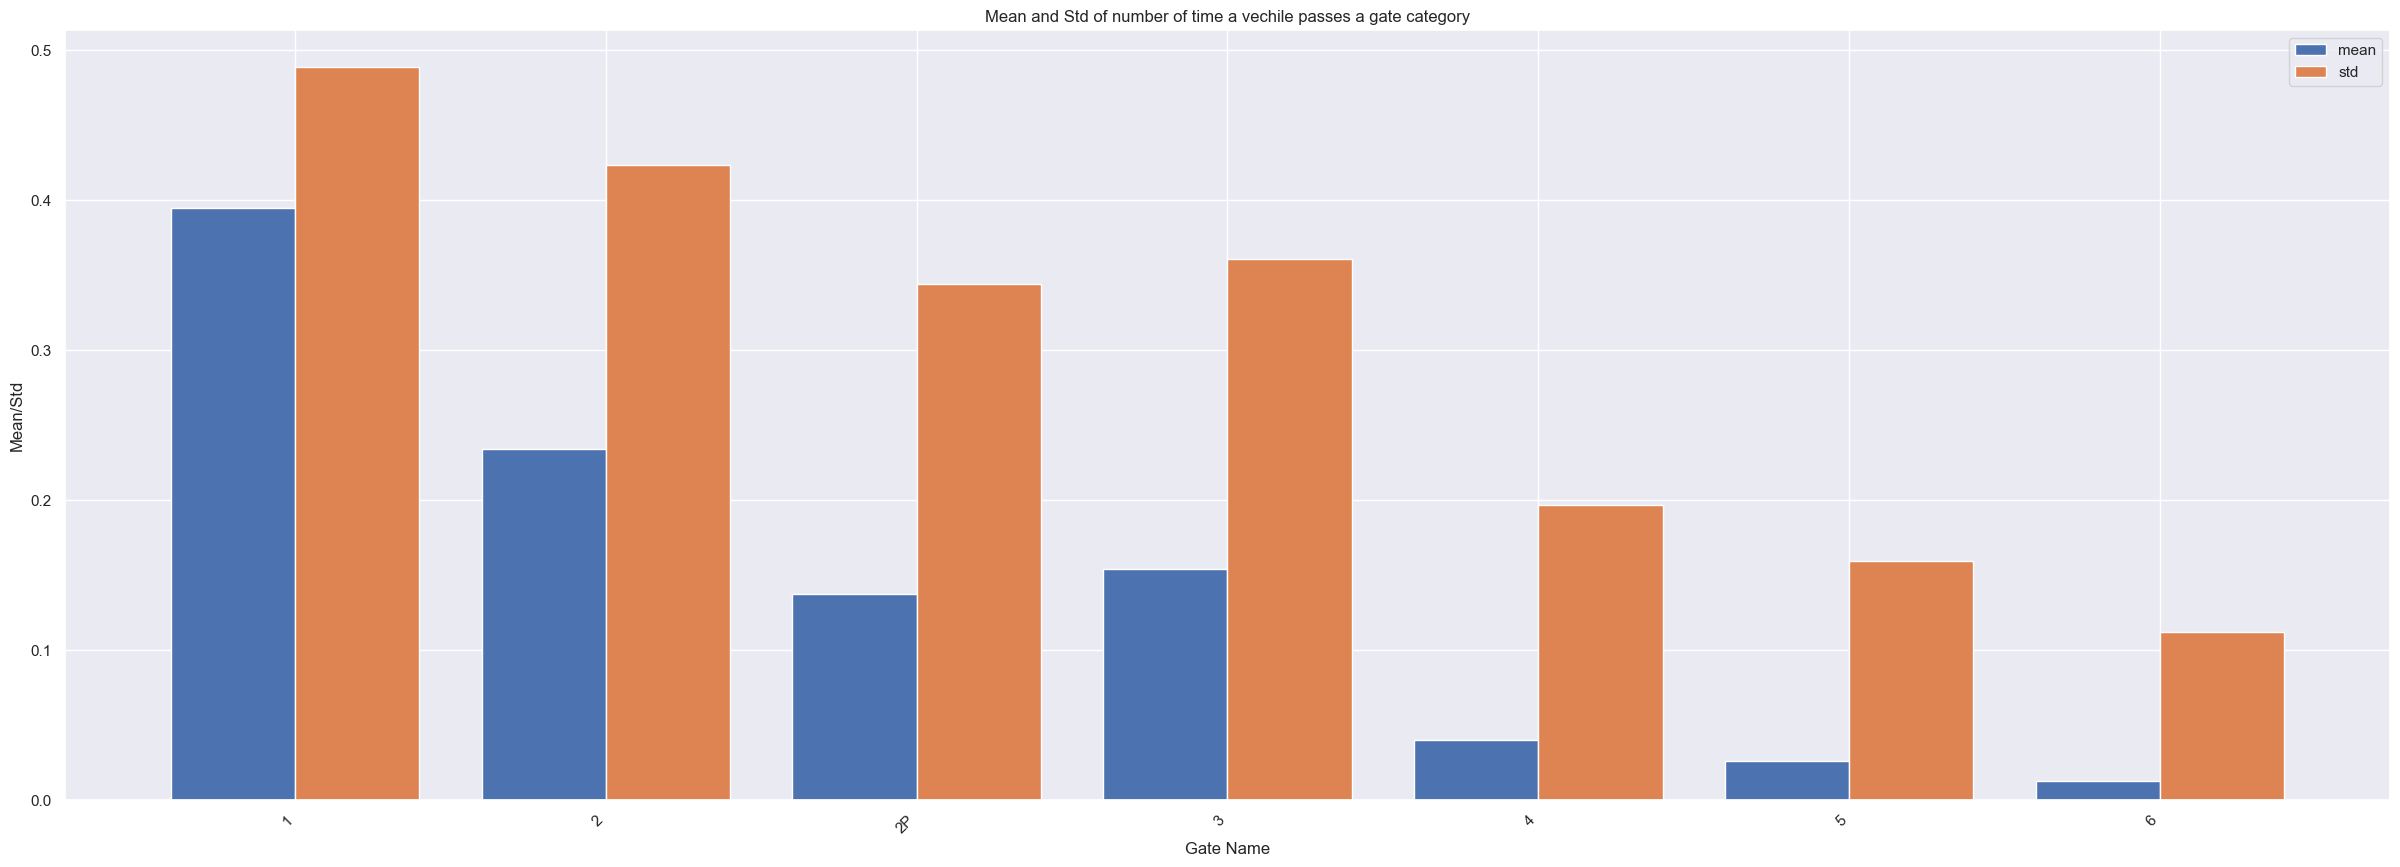

In [21]:
X = summary.columns
mean = list(summary.loc['mean'])
std = list(summary.loc['std'])
  
X_axis = np.arange(len(X)) 
fig = plt.figure(figsize=(30,10))
plt.bar(X_axis - 0.2, mean, 0.4, label = 'mean') 
plt.bar(X_axis + 0.2, std, 0.4, label = 'std') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Gate Name") 
plt.xticks(rotation=45, ha='right')
plt.ylabel("Mean/Std") 
plt.title("Mean and Std of number of time a vechile passes a gate category") 
plt.legend() 
plt.show() 

## For Each Car

In [22]:
dummy = pd.get_dummies(df['car-type'],dtype=int)
numerical_data = pd.concat((df,dummy),axis=1)
summary = numerical_data.describe()

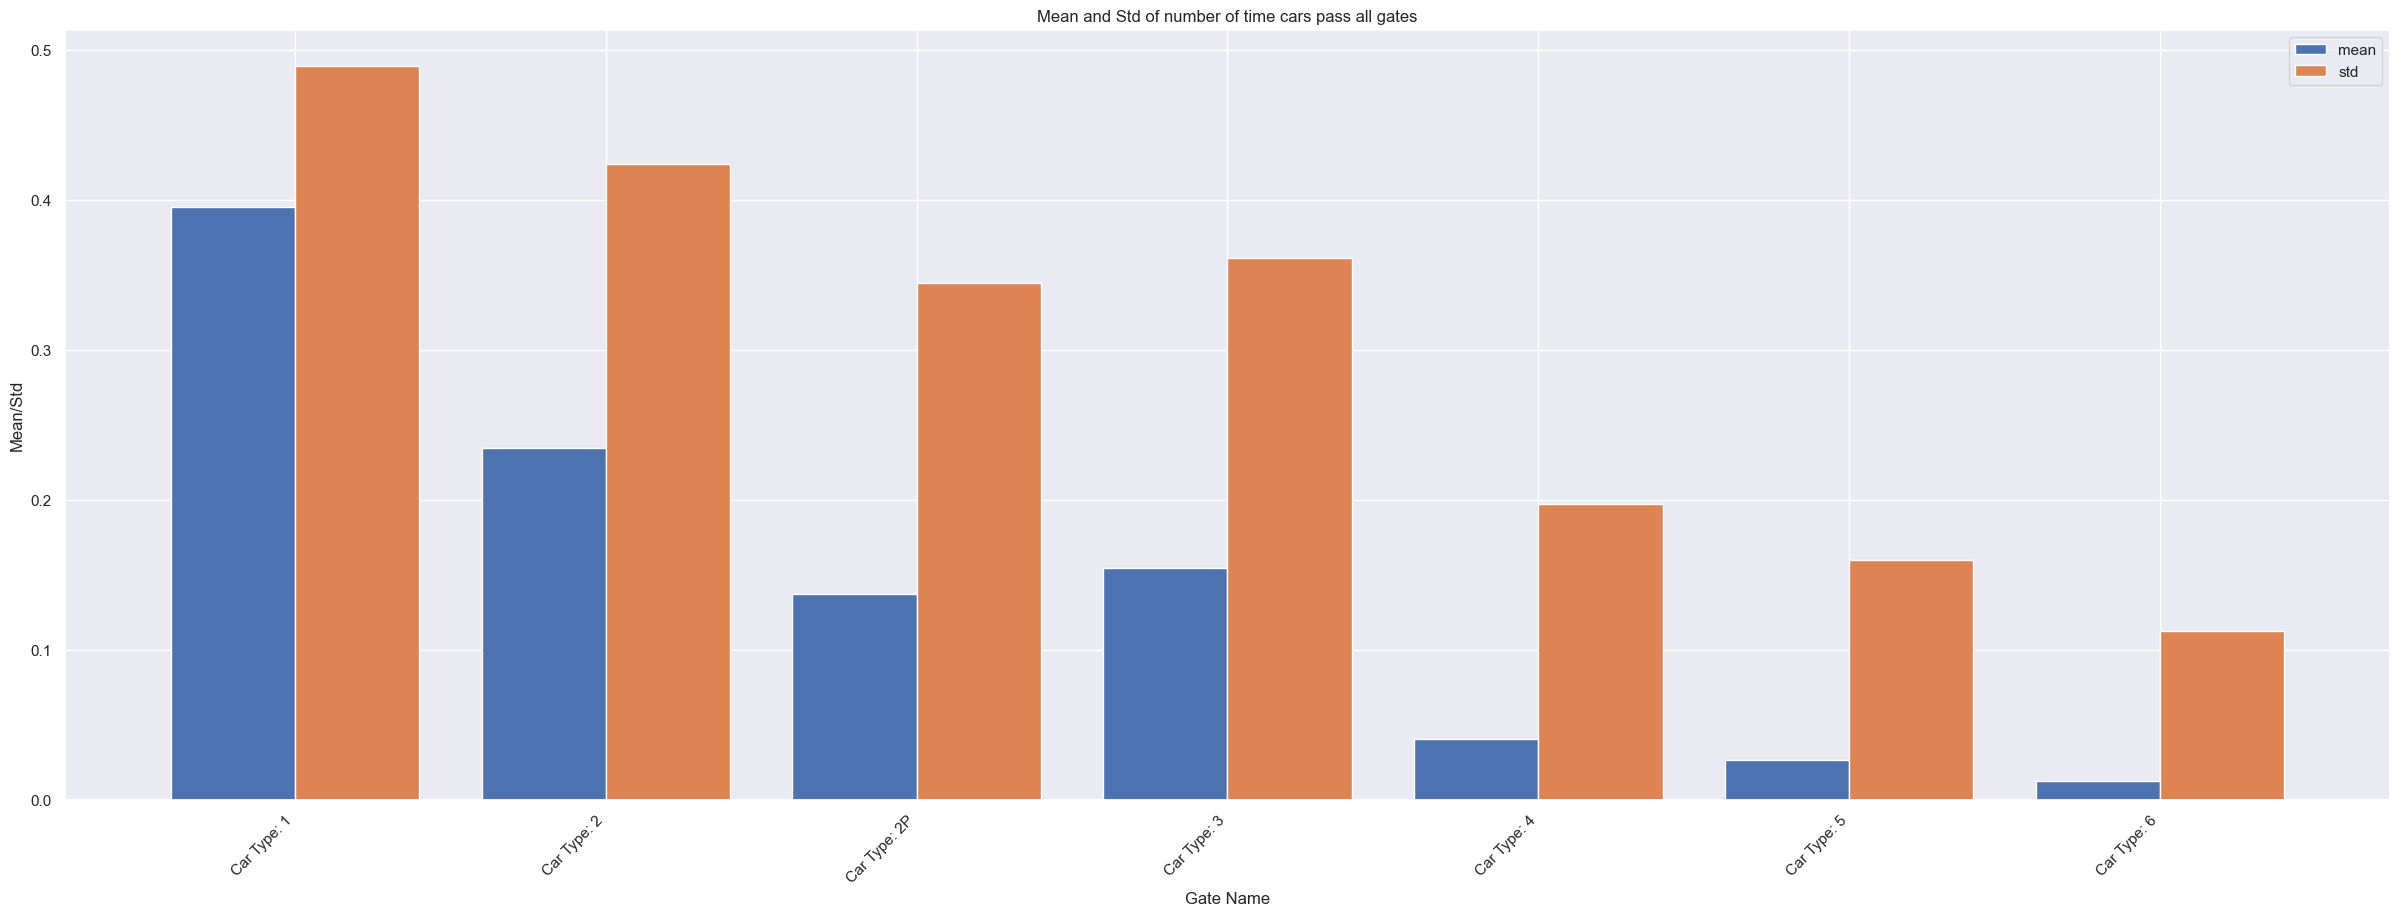

In [24]:
X = ["Car Type: "+i for i in summary.columns]
mean = list(summary.loc['mean'])
std = list(summary.loc['std'])
  
X_axis = np.arange(len(X)) 
fig = plt.figure(figsize=(30,10))
plt.bar(X_axis - 0.2, mean, 0.4, label = 'mean') 
plt.bar(X_axis + 0.2, std, 0.4, label = 'std') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Car Type") 
plt.xticks(rotation=45, ha='right')
plt.ylabel("Mean/Std") 
plt.title("Mean and Std of number of time cars pass all gates") 
plt.legend() 
plt.show() 

# Distribution plots

In [30]:
df['count'] = np.ones(len(df))

## For Car Types

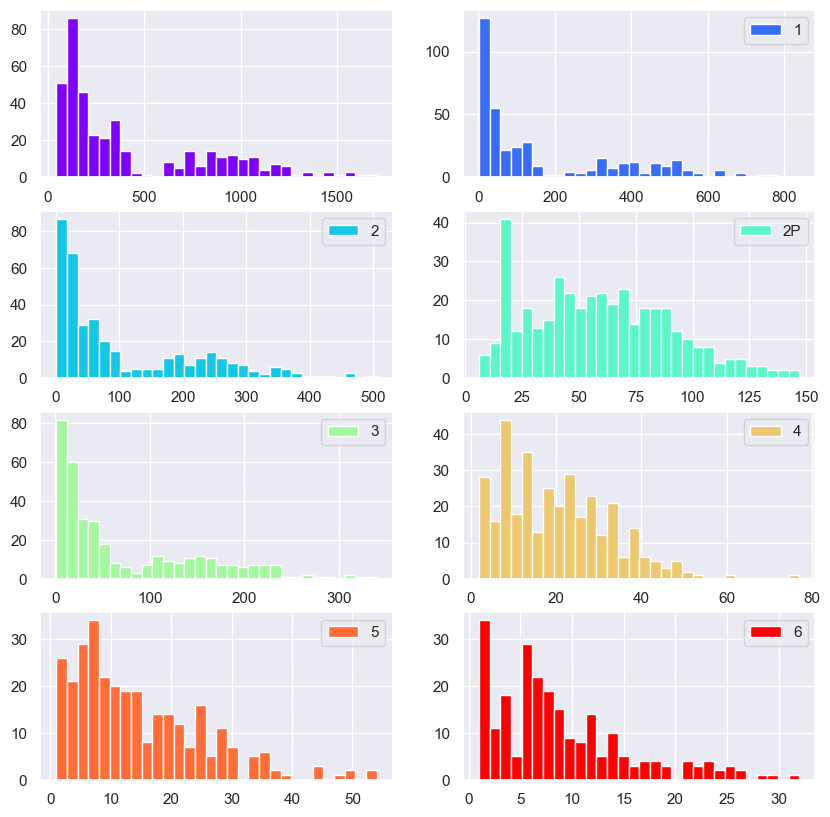

In [201]:
fig,axs = plt.subplots(4,2,figsize=(10,10))
axes = axs.flat
colors = cm.rainbow(np.linspace(0, 1, 8))
axes[0].hist(df.groupby([df.index.date])[['count']].sum(),bins=30,label="ALL",color = colors[0])
cartypes = np.unique(df['car-type'])
for ax, cartype,color in zip(axes[1:],cartypes,colors[1:]):
    by_date = df[df['car-type']==cartype].groupby([df[df['car-type']==cartype].index.date])[['count']].sum()
    ax.hist(by_date,bins=30,label=cartype,color=color)
    ax.legend()
plt.show()

## At Each Gate Type

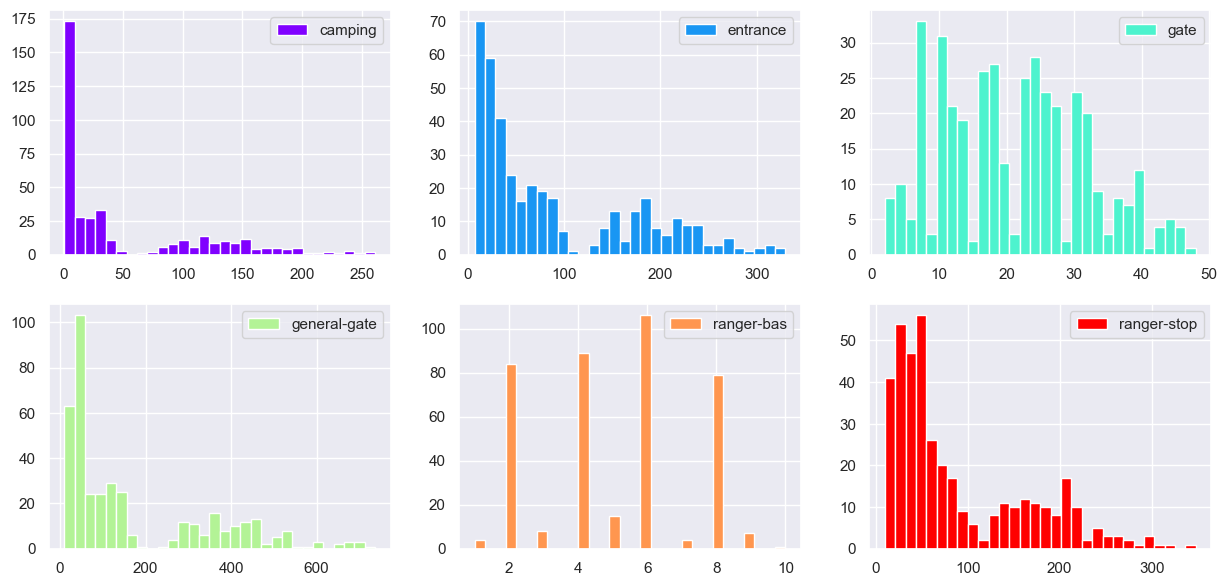

In [205]:
fig,axs = plt.subplots(2,3,figsize=(15,7))
axes = axs.flat
colors = cm.rainbow(np.linspace(0, 1, 6))
gatetypes = np.unique(df['gate_category'])
for ax, gatetype,color in zip(axes,gatetypes,colors):
    by_date = df[df['gate_category']==gatetype].groupby([df[df['gate_category']==gatetype].index.date])[['count']].sum()
    ax.hist(by_date,bins=30,label=gatetype,color=color)
    ax.legend()
plt.show()

# Box Plots

## For Each Gate

In [174]:

cartypes = ['1', '2', '3','4', '5', '6']
data = []
car_type = []
# data.append(df.groupby([df.index.date])[['count']].sum()['count'])

for cartype in cartypes:
    by_date = df[df['car-type']==cartype].groupby([df[df['car-type']==cartype].index.date])[['count']].sum()
    # print(len(by_date['count']))
    data.append(by_date['count'])
    car_type.append("Car Type :"+cartype)
    

    

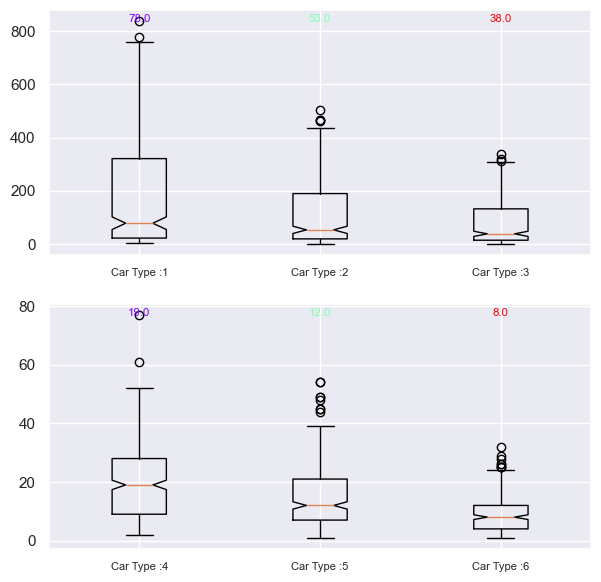

In [178]:
fig,aex = plt.subplots(2,1,figsize=(7,7))

axes = aex.flat
end =3
for ax in axes:
    bp = ax.boxplot(data[end-3:end],notch=True,vert=True, whis=1.5)
    ax.set_xticklabels(car_type[end-3:end], fontsize=8)
    medians =  [i.get_ydata()[1] for i in bp['medians']]
    colors = cm.rainbow(np.linspace(0, 1, 3))
    pos = np.arange(3) + 1
    for tick, label in zip(range(3), ax.get_xticklabels()):
        ax.text(pos[tick], .95, medians[tick],
                transform=ax.get_xaxis_transform(),
             horizontalalignment='center', size='x-small',color=colors[tick])
    end+=3
plt.show() 

## For Each Car

In [161]:

gatetypes = ['entrance',  'general-gate','camping','ranger-stop', 'ranger-bas','gate']
data = []

pos = np.arange(6) + 1
for gatetype in gatetypes:
    by_date = df[df['gate_category']==gatetype].groupby([df[df['gate_category']==gatetype].index.date])[['count']].sum()
    # print(len(by_date['count']))
    data.append(by_date['count'])
    

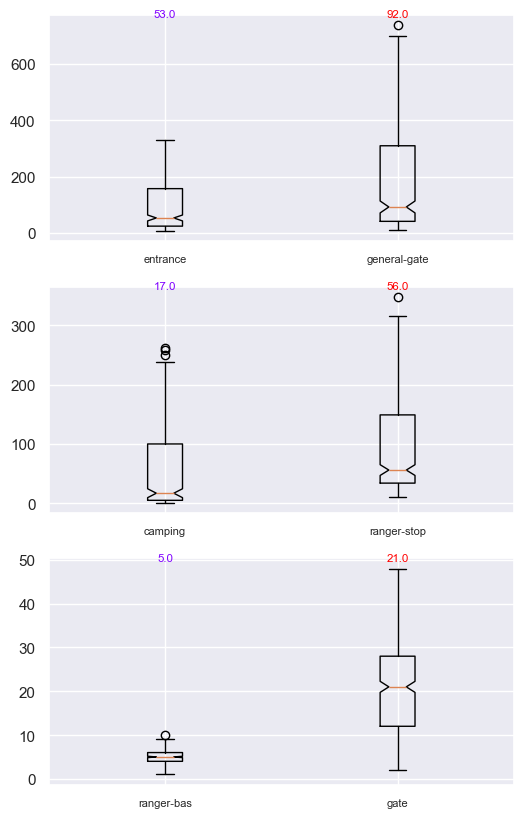

In [164]:
fig,axs = plt.subplots(3,1,figsize=(6,10))

axes = axs.flat
end = 2
for ax in axes:
    bp = ax.boxplot(data[end-2:end],notch=True,vert=True, whis=1.5)
    ax.set_xticklabels(gatetypes[end-2:end], fontsize=8)
    medians =  [i.get_ydata()[1] for i in bp['medians']]
    pos = np.arange(2) + 1
    colors = cm.rainbow(np.linspace(0, 1, 2))
    for tick, label in zip(range(2), ax.get_xticklabels()):
        ax.text(pos[tick], 0.99, medians[tick],
                transform=ax.get_xaxis_transform(),
                horizontalalignment='center', size='x-small',color=colors[tick])
    end +=2
    
plt.show() 

# ETS Decomposition

In [ ]:
fig,axs = plt.subplots(4,2,figsize=(10,10))
axes = axs.flat
colors = cm.rainbow(np.linspace(0, 1, 8))
axes[0].hist(df.groupby([df.index.date])[['count']].sum(),bins=30,label="ALL",color = colors[0])
cartypes = np.unique(df['car-type'])
for ax, cartype,color in zip(axes[1:],cartypes,colors[1:]):
    by_date = df[df['car-type']==cartype].groupby([df[df['car-type']==cartype].index.date])[['count']].sum()
    ax.hist(by_date,bins=30,label=cartype,color=color)
    ax.legend()
plt.show()

In [240]:
v = df[df['car-type']=="2P"].groupby([df[df['car-type']=="2P"].index.date])[['count']].sum()

In [217]:
v.index

Index([2015-05-02, 2015-05-04, 2015-05-06, 2015-05-07, 2015-05-10, 2015-05-11,
       2015-05-12, 2015-05-13, 2015-05-14, 2015-05-16,
       ...
       2016-05-19, 2016-05-20, 2016-05-21, 2016-05-22, 2016-05-24, 2016-05-25,
       2016-05-28, 2016-05-29, 2016-05-30, 2016-05-31],
      dtype='object', length=239)

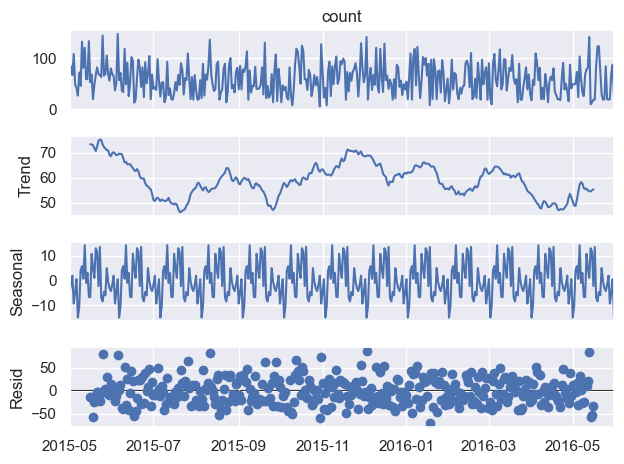

In [245]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(v["count"], model='additive',period=30)
fig=result.plot()

In [227]:
result.seasonal

2015-05-02   -1.091230
2015-05-04   -2.841230
2015-05-06   -1.162659
2015-05-07    6.832579
2015-05-10   -1.384087
                ...   
2016-05-25    2.134960
2016-05-28   -0.262659
2016-05-29    2.008770
2016-05-30    5.713532
2016-05-31   -1.722183
Name: seasonal, Length: 239, dtype: float64